In [90]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the requests library. 
# Run from terminal: - conda install -c conda-forge requests
import requests
#requests.__version__

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [91]:
# Generate latitudes and longitudes
# stored to access later
# creating arrays of latitudes and longitudes
# generate the random latitudes, create similar code snippet generate longitudes.
# Ensure enough latitudes and longitudes, start with 1,500.
# Pack the latitudes (lats) and longitudes (lngs) as pairs by zipping them (lat_lngs) with the zip() function.

# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [92]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [93]:
# You can only unzip a zipped tuple once before it is removed from the computer’s memory. Make sure you unzip the latitudes and longitudes into the coordinates list before moving on.
# DON'T do this :) - list(lat_lngs)

In [94]:
# Use the coordinates in our lat_lngs tuple to find the nearest city using Python’s citipy module.

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [95]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4bbe0b849fe50cdbed011ec1a0b8a5b3


In [96]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | nouadhibou
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 4 of Set 1 | aksu
Processing Record 5 of Set 1 | lavrentiya
Processing Record 6 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 7 of Set 1 | tornio
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | constitucion
Processing Record 10 of Set 1 | hualmay
Processing Record 11 of Set 1 | east london
Processing Record 12 of Set 1 | jamestown
Processing Record 13 of Set 1 | nanortalik
Processing Record 14 of Set 1 | weligama
Processing Record 15 of Set 1 | saleaula
City not found. Skipping...
Processing Record 16 of Set 1 | nizhniy kuranakh
Processing Record 17 of Set 1 | carmen
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | bay roberts
Processing Record

Processing Record 39 of Set 4 | namibe
Processing Record 40 of Set 4 | beringovskiy
Processing Record 41 of Set 4 | marawi
Processing Record 42 of Set 4 | hovd
Processing Record 43 of Set 4 | pacific grove
Processing Record 44 of Set 4 | bethel
Processing Record 45 of Set 4 | nioro
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | nyagan
Processing Record 48 of Set 4 | alofi
Processing Record 49 of Set 4 | boralday
Processing Record 50 of Set 4 | longyearbyen
Processing Record 1 of Set 5 | bilma
Processing Record 2 of Set 5 | nantucket
Processing Record 3 of Set 5 | lata
Processing Record 4 of Set 5 | chegdomyn
Processing Record 5 of Set 5 | ponta do sol
Processing Record 6 of Set 5 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 5 | aquitania
Processing Record 8 of Set 5 | talcahuano
Processing Record 9 of Set 5 | hami
Processing Record 10 of Set 5 | solnechnyy
Processing Record 11 of Set 5 | novyy urengoy
Processing Record 12 of Set 5 | kosino

Processing Record 28 of Set 8 | mount gambier
Processing Record 29 of Set 8 | salmas
Processing Record 30 of Set 8 | fort nelson
Processing Record 31 of Set 8 | havoysund
Processing Record 32 of Set 8 | vaitupu
City not found. Skipping...
Processing Record 33 of Set 8 | zalantun
Processing Record 34 of Set 8 | yantai
Processing Record 35 of Set 8 | severo-kurilsk
Processing Record 36 of Set 8 | warrington
Processing Record 37 of Set 8 | muscat
Processing Record 38 of Set 8 | egvekinot
Processing Record 39 of Set 8 | broome
Processing Record 40 of Set 8 | ourem
Processing Record 41 of Set 8 | mahajanga
Processing Record 42 of Set 8 | collie
Processing Record 43 of Set 8 | sao filipe
Processing Record 44 of Set 8 | kruisfontein
Processing Record 45 of Set 8 | vila velha
Processing Record 46 of Set 8 | clarence town
Processing Record 47 of Set 8 | trairi
Processing Record 48 of Set 8 | okandja
City not found. Skipping...
Processing Record 49 of Set 8 | deh rawud
City not found. Skipping..

Processing Record 13 of Set 12 | jibuti
Processing Record 14 of Set 12 | pathalgaon
Processing Record 15 of Set 12 | paita
Processing Record 16 of Set 12 | tambura
Processing Record 17 of Set 12 | ayios matthaios
City not found. Skipping...
Processing Record 18 of Set 12 | inirida
Processing Record 19 of Set 12 | yegorlykskaya
Processing Record 20 of Set 12 | erenhot
Processing Record 21 of Set 12 | xiamen
Processing Record 22 of Set 12 | vestmannaeyjar
Processing Record 23 of Set 12 | ondjiva
Processing Record 24 of Set 12 | kaseda
Processing Record 25 of Set 12 | kuna
Processing Record 26 of Set 12 | buraydah
Processing Record 27 of Set 12 | bairiki
Processing Record 28 of Set 12 | manama
Processing Record 29 of Set 12 | bintulu
Processing Record 30 of Set 12 | morehead
Processing Record 31 of Set 12 | itoman
Processing Record 32 of Set 12 | lubango
Processing Record 33 of Set 12 | samusu
City not found. Skipping...
Processing Record 34 of Set 12 | terney
Processing Record 35 of Set 

In [97]:
city_data

[{'City': 'Nouadhibou',
  'Lat': 20.93,
  'Lng': -17.03,
  'Max Temp': 77,
  'Humidity': 61,
  'Cloudiness': 0,
  'Wind Speed': 24.16,
  'Country': 'MR',
  'Date': '2020-06-28 16:04:35'},
 {'City': 'Dikson',
  'Lat': 73.51,
  'Lng': 80.55,
  'Max Temp': 43.97,
  'Humidity': 100,
  'Cloudiness': 100,
  'Wind Speed': 9.04,
  'Country': 'RU',
  'Date': '2020-06-28 16:06:20'},
 {'City': 'Aksu',
  'Lat': 41.12,
  'Lng': 80.26,
  'Max Temp': 71.13,
  'Humidity': 33,
  'Cloudiness': 100,
  'Wind Speed': 4.83,
  'Country': 'CN',
  'Date': '2020-06-28 16:06:21'},
 {'City': 'Lavrentiya',
  'Lat': 65.58,
  'Lng': -171,
  'Max Temp': 38.88,
  'Humidity': 81,
  'Cloudiness': 41,
  'Wind Speed': 9.24,
  'Country': 'RU',
  'Date': '2020-06-28 16:04:33'},
 {'City': 'Tornio',
  'Lat': 65.85,
  'Lng': 24.15,
  'Max Temp': 66.2,
  'Humidity': 48,
  'Cloudiness': 1,
  'Wind Speed': 6.93,
  'Country': 'FI',
  'Date': '2020-06-28 16:06:21'},
 {'City': 'Qaanaaq',
  'Lat': 77.48,
  'Lng': -69.36,
  'Max Temp'

In [98]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Nouadhibou,20.93,-17.03,77.00,61,0,24.16,MR,2020-06-28 16:04:35
1,Dikson,73.51,80.55,43.97,100,100,9.04,RU,2020-06-28 16:06:20
2,Aksu,41.12,80.26,71.13,33,100,4.83,CN,2020-06-28 16:06:21
3,Lavrentiya,65.58,-171.00,38.88,81,41,9.24,RU,2020-06-28 16:04:33
4,Tornio,65.85,24.15,66.20,48,1,6.93,FI,2020-06-28 16:06:21
5,Qaanaaq,77.48,-69.36,43.79,63,29,4.50,GL,2020-06-28 16:06:21
6,Constitucion,-35.33,-72.42,54.00,93,100,15.93,CL,2020-06-28 16:06:21
7,Hualmay,-11.10,-77.61,66.79,68,52,9.04,PE,2020-06-28 16:04:25
8,East London,-33.02,27.91,64.42,46,22,22.48,ZA,2020-06-28 16:06:22
9,Jamestown,42.10,-79.24,71.60,64,20,11.41,US,2020-06-28 16:06:22


In [99]:
new_column_order=['City','Country','Date','Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']

In [100]:
city_data_df = city_data_df[new_column_order]

In [101]:
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2020-06-28 16:04:35,20.93,-17.03,77.00,61,0,24.16
1,Dikson,RU,2020-06-28 16:06:20,73.51,80.55,43.97,100,100,9.04
2,Aksu,CN,2020-06-28 16:06:21,41.12,80.26,71.13,33,100,4.83
3,Lavrentiya,RU,2020-06-28 16:04:33,65.58,-171.00,38.88,81,41,9.24
4,Tornio,FI,2020-06-28 16:06:21,65.85,24.15,66.20,48,1,6.93
...,...,...,...,...,...,...,...,...,...
563,Sao Jose Da Coroa Grande,BR,2020-06-28 16:06:56,-8.90,-35.15,78.75,80,52,12.53
564,Avera,US,2020-06-28 16:07:07,33.19,-82.53,89.60,59,1,10.29
565,Sabzevar,IR,2020-06-28 16:04:34,36.21,57.68,78.60,16,0,18.37
566,Praid,RO,2020-06-28 16:07:07,46.55,25.13,84.20,48,20,5.82


In [102]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [103]:
# Create scatter plots for:
# - latitude vs. maximum temperature, humidity, cloudiness, and wind speed. 

# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [104]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1593360428.3252008

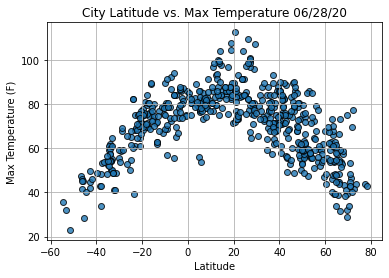

In [105]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

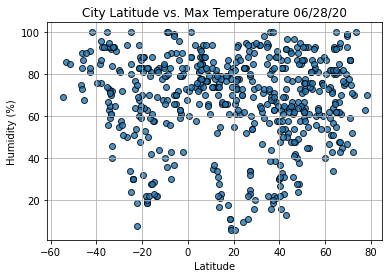

In [106]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

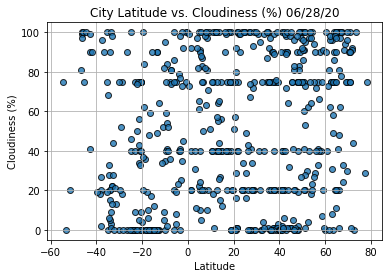

In [107]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

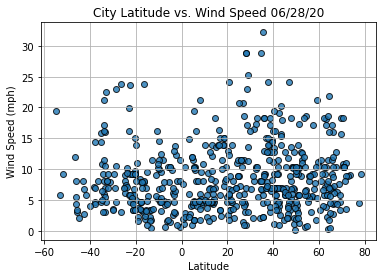

In [108]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [136]:
# Find the Correlation Between Latitude and Maximum Temperature

# For each weather parameter in each hemisphere. The variables for each graph are as follows:
# - x values, the latitudes
# - y values, each of the four weather parameters
# -  y label, the weather parameter being plotted
# - x- and y-values given as a tuple, (10,40), for the regression line equation to be placed on the scatter plot.

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.  
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
        
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regression_stats = "\nr = " + str(round(r_value,5))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq + regression_stats, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [137]:
# Create the Hemisphere DataFrames

# Code to perform regression analysis on the maximum temperatures in the Northern and Southern Hemispheres
#index13 = city_data_df.loc[13]
#index13
#city_data_df['Lat'] >=0

In [138]:
# Return a DataFrame with all data fitting the criteria, for latitudes greater than or equal to 0
# Norther hemisphers
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
northern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Nouadhibou,MR,2020-06-28 16:04:35,20.93,-17.03,77.00,61,0,24.16
1,Dikson,RU,2020-06-28 16:06:20,73.51,80.55,43.97,100,100,9.04
2,Aksu,CN,2020-06-28 16:06:21,41.12,80.26,71.13,33,100,4.83
3,Lavrentiya,RU,2020-06-28 16:04:33,65.58,-171.00,38.88,81,41,9.24
4,Tornio,FI,2020-06-28 16:06:21,65.85,24.15,66.20,48,1,6.93
...,...,...,...,...,...,...,...,...,...
561,Arlit,NE,2020-06-28 16:07:07,18.74,7.39,107.44,6,0,15.08
564,Avera,US,2020-06-28 16:07:07,33.19,-82.53,89.60,59,1,10.29
565,Sabzevar,IR,2020-06-28 16:04:34,36.21,57.68,78.60,16,0,18.37
566,Praid,RO,2020-06-28 16:07:07,46.55,25.13,84.20,48,20,5.82


In [139]:
# Southern hemisphers
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]
southern_hemi_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
6,Constitucion,CL,2020-06-28 16:06:21,-35.33,-72.42,54.00,93,100,15.93
7,Hualmay,PE,2020-06-28 16:04:25,-11.10,-77.61,66.79,68,52,9.04
8,East London,ZA,2020-06-28 16:06:22,-33.02,27.91,64.42,46,22,22.48
14,New Norfolk,AU,2020-06-28 16:06:13,-42.78,147.06,42.01,91,41,2.75
15,Rikitea,PF,2020-06-28 16:03:54,-23.12,-134.97,68.02,64,9,19.86
...,...,...,...,...,...,...,...,...,...
550,Bonito,BR,2020-06-28 16:07:06,-21.12,-56.48,73.63,63,33,4.36
554,Samarai,PG,2020-06-28 16:07:07,-10.62,150.67,78.31,85,82,16.15
558,Santa Maria,BR,2020-06-28 16:02:12,-29.68,-53.81,53.60,81,20,9.17
562,Yulara,AU,2020-06-28 16:07:07,-25.24,130.99,50.00,34,0,6.93


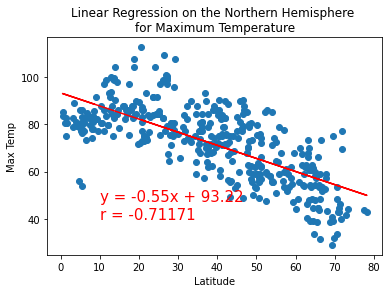

In [140]:
# Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, 
                       y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',
                       (10,40))

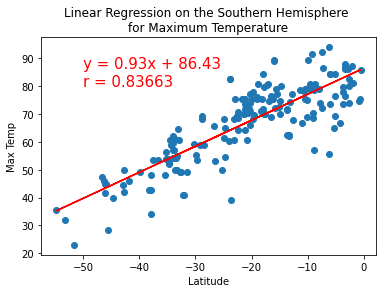

In [146]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 
                       'Max Temp',
                       (-50,80))

In [147]:
# FINDING

# The correlation between the latitude and the maximum temperature is strong to very strong because
# - the r-value is less than –0.7 for the Northern Hemisphere and 
# - greater than 0.7 for the Southern Hemisphere, as shown by the plots here. This means that as we approach the equator, 0° latitude, the temperatures become warmer. And when we are further from the equator the temperatures become cooler.




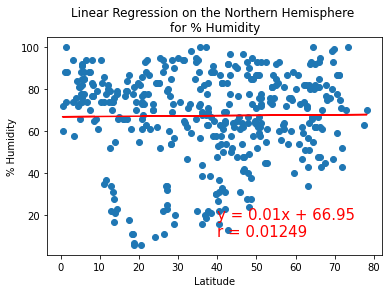

In [152]:
# Find the Correlation Between Latitude and Percent Humidity

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', 
                       '% Humidity',
                       (40,10))

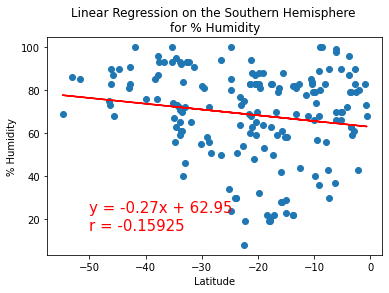

In [153]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', 
                       '% Humidity',
                       (-50,15))

In [154]:
# FINDING

# The correlation between the latitude and percent humidity is 
# - very low because 
# - r-value is less than 0.04 for the Northern and Southern Hemispheres for the plots shown here. This means that percent humidity is unpredictable due to changing weather patterns that can increase or decrease percent humidity. 
# - Check the r-values for your plots. 


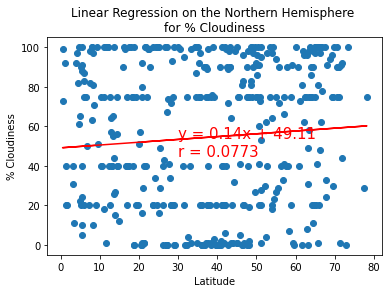

In [162]:
# Find the Correlation Between Latitude and Percent Cloudiness

# Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',
                       (30,45))

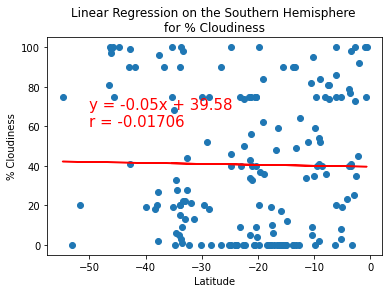

In [164]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', 
                       '% Cloudiness',
                       (-50,60))

In [166]:
# FINDING

# The correlation between the latitude and percent cloudiness is 
# - very low because the r-value is less than –0.09 for the Northern Hemisphere and less than –0.02 for the Southern Hemisphere for the plots shown here. 
# - This means that cloudiness is unpredictable due to changing weather patterns that can increase or decrease percent cloudiness. 
# - Check the r-values for your plots. 


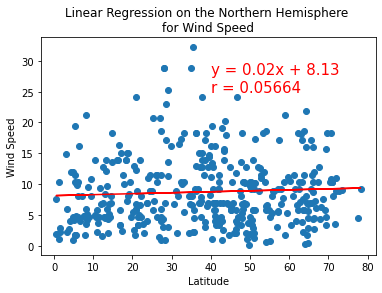

In [169]:
# Find the Correlation Between Latitude and Wind Speed

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',
                       (40,25))

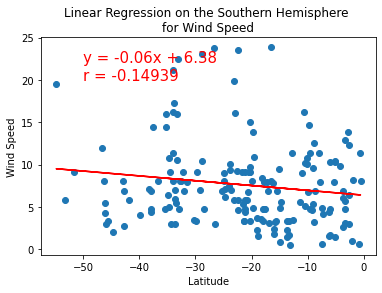

In [171]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 
                       'Wind Speed',
                       (-50,20))

In [172]:
# FINDING

# The correlation between the latitude and wind speed is very low because 
# - the r-value is less  than –0.07 for the Northern Hemisphere and less than –0.3 for the Southern Hemisphere for the plots shown here . 
# - This means that wind speed is unpredictable due to changing weather patterns that can increase or decrease wind speed. 
# - Check the r-values for your plots. 
